In [5]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import statistics
import numpy as np
import scipy.stats

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib as plt
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [20]:
data = pd.read_excel(r'D:\Downloads\Average_10years.xlsx')
data

,Country Name,GDP growth Average,R&D exprenditure,Capital formation,Patents,GDP real,Higher education,GINI index,Education expenditure,Employement
0,Aruba,-0.544224,NaN,NaN,NaN,1.354665e+09,25.329247,NaN,6.181617,NaN
1,Afghanistan,4.088612,NaN,NaN,NaN,1.874830e+10,8.025470,NaN,3.396580,88.761273
2,Angola,1.575790,0.032290,23.824814,31.000000,2.844412e+09,8.176458,51.300000,NaN,92.339818
3,Albania,2.037071,NaN,25.164227,11.714286,1.874830e+10,57.674097,32.014286,3.403082,85.618273
4,Andorra,-0.917304,NaN,NaN,2.333333,2.844412e+09,NaN,NaN,3.075100,100.000000
...,...,...,...,...,...,...,...,...,...,...
214,Kosovo,3.708966,NaN,29.839046,NaN,7.032761e+10,NaN,28.237500,NaN,100.000000
215,"Yemen, Rep.",-4.252164,NaN,NaN,29.100000,4.709608e+10,10.458240,36.700000,NaN,86.721545
216,South Africa,0.983352,0.691866,16.995354,692.000000,4.461963e+10,21.006797,63.200000,5.551640,73.924546
217,Zambia,4.191616,NaN,31.839050,10.727273,2.095493e+10,4.142450,56.350000,4.200838,89.130091


In [21]:
#количество пропущенных значений
len(data.index) - data.count()

Country Name              0
GDP growth Average        8
R&D exprenditure         84
Capital formation        40
Patents                  68
GDP real                  0
Higher education         38
GINI index               64
Education expenditure    28
Employement               3
dtype: int64

In [22]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country Name           219 non-null    object 
 1   GDP growth Average     211 non-null    float64
 2   R&D exprenditure       135 non-null    float64
 3   Capital formation      179 non-null    float64
 4   Patents                151 non-null    float64
 5   GDP real               219 non-null    float64
 6   Higher education       181 non-null    float64
 7   GINI index             155 non-null    float64
 8   Education expenditure  191 non-null    float64
 9   Employement            216 non-null    float64
dtypes: float64(9), object(1)
memory usage: 17.2+ KB


,Country Name,GDP growth Average,R&D exprenditure,Capital formation,Patents,GDP real,Higher education,GINI index,Education expenditure,Employement
0,Aruba,-0.544224,NaN,NaN,NaN,1.354665e+09,25.329247,NaN,6.181617,NaN
1,Afghanistan,4.088612,NaN,NaN,NaN,1.874830e+10,8.025470,NaN,3.396580,88.761273
2,Angola,1.575790,0.032290,23.824814,31.000000,2.844412e+09,8.176458,51.300000,NaN,92.339818
3,Albania,2.037071,NaN,25.164227,11.714286,1.874830e+10,57.674097,32.014286,3.403082,85.618273
4,Andorra,-0.917304,NaN,NaN,2.333333,2.844412e+09,NaN,NaN,3.075100,100.000000
...,...,...,...,...,...,...,...,...,...,...
214,Kosovo,3.708966,NaN,29.839046,NaN,7.032761e+10,NaN,28.237500,NaN,100.000000
215,"Yemen, Rep.",-4.252164,NaN,NaN,29.100000,4.709608e+10,10.458240,36.700000,NaN,86.721545
216,South Africa,0.983352,0.691866,16.995354,692.000000,4.461963e+10,21.006797,63.200000,5.551640,73.924546
217,Zambia,4.191616,NaN,31.839050,10.727273,2.095493e+10,4.142450,56.350000,4.200838,89.130091


In [23]:
#описательная статистика
data.describe()

,GDP growth Average,R&D exprenditure,Capital formation,Patents,GDP real,Higher education,GINI index,Education expenditure,Employement
count,211.000000,135.000000,179.000000,151.000000,2.190000e+02,181.000000,155.000000,191.000000,216.000000
mean,2.464949,0.831916,23.557783,14089.918803,4.370200e+11,39.594260,37.692155,4.633848,92.995100
std,2.505188,0.929835,7.242165,84734.331171,2.157625e+12,28.778394,7.465271,2.137331,6.119884
min,-6.997442,0.010360,8.660954,1.000000,1.623442e+08,0.671185,25.070000,1.245862,73.331727
25%,0.992269,0.225904,19.222106,10.613636,5.615686e+09,13.817943,32.472222,3.313526,90.033250
50%,2.348781,0.453380,22.720136,99.363636,1.161358e+10,33.933039,36.700000,4.294070,94.444091
75%,4.014818,1.038063,26.657707,866.136364,5.087528e+10,61.438006,42.133333,5.514719,97.287182
max,9.440574,4.463629,53.402747,922856.454545,1.812612e+13,125.000147,63.200000,16.663000,100.000000


In [43]:
#Удалении пропусков
data_full = data.dropna()
data_full = data_full.reset_index(drop=True)

In [42]:
#описательная статистика после удаления пропусков
df = data_full.rename(columns={'GDP growth Average': 'GDP_growth','Education expenditure': 'Ed_exp', 'R&D exprenditure': 'RD', 'Capital formation':'Capital_formation', 'GDP real':'GDP', 'Higher education': 'HighEd','GINI index': 'gini','Employement': 'Empl'})
df.describe()

,GDP_growth,RD,Capital_formation,Patents,GDP,HighEd,gini,Ed_exp,Empl
count,97.000000,97.000000,97.000000,97.000000,9.700000e+01,97.000000,97.000000,97.000000,97.000000
mean,2.827626,0.962496,23.333956,16007.039088,7.611156e+11,48.889064,37.263328,4.762762,92.334289
std,1.956310,0.976235,5.808072,98566.998101,3.002063e+12,28.386390,8.011896,1.401225,5.223785
min,-2.717560,0.027455,11.885977,1.000000,1.623442e+08,4.032903,25.070000,1.858826,73.924546
25%,1.537665,0.261060,19.833545,19.090909,5.615686e+09,25.152145,31.230000,3.778140,90.073636
50%,2.483289,0.653315,22.428326,188.636364,2.167226e+10,50.695103,35.770000,4.695188,94.254273
75%,3.836364,1.337885,25.888719,1287.000000,1.266616e+11,68.332651,42.100000,5.477799,95.613727
max,9.440574,4.463629,43.097721,922856.454545,1.812612e+13,125.000147,63.200000,9.320419,100.000000


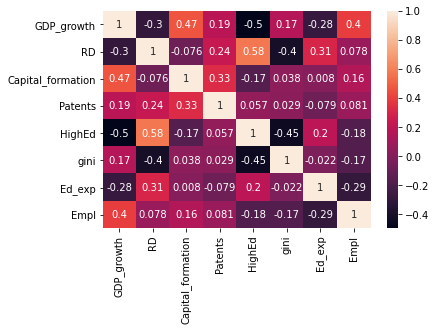

In [26]:
#heatmap
cols = ['GDP_growth', 'RD', 'Capital_formation', 'Patents', 'HighEd', 'gini', 'Ed_exp', 'Empl']
hm = sns.heatmap(df[cols].corr(),
                 cbar=True,
                 annot=True)

Slope: -0.15
Intercept: 1.38


Text(0, 0.5, 'R&D expenditures')

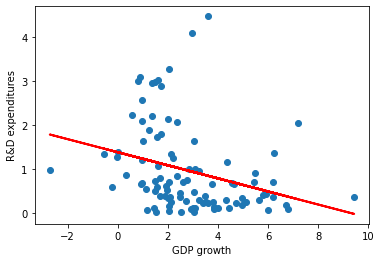

In [17]:
#зависимость между ростом ВВП и затртами на НИОКР для 97 стран
X = df[['GDP_growth']].values
y = df['RD'].values
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2)
plt.xlabel('GDP growth')
plt.ylabel('R&D expenditures')

Slope: 7.51
Intercept: -7.73


Text(0, 0.5, 'R&D expenditures')

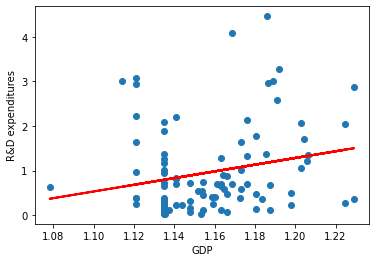

In [49]:
#зависимость меджу ВВП и затратами на НИОКР
df['GDP'] = df['GDP'].apply(math.log).tolist()
X = df[['GDP']].values
y = df['RD'].values
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2)
plt.xlabel('GDP')
plt.ylabel('R&D expenditures')

In [31]:
#описательная статистика для развитых стран
dc = pd.read_excel(r'D:\Downloads\Developed.xlsx')
dc.describe()

,gdp_growth,rd,capital_formation,patents,gdp,highed,gini,ed_exp,empl
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000
mean,1.936304,2.136844,22.640765,48988.996970,1.233174e+12,71.106957,31.834472,5.289948,92.561691
std,1.617103,0.934052,5.048453,174635.405414,3.786973e+12,17.472998,4.342764,1.127480,3.316986
min,-0.569626,0.621255,16.806357,37.000000,1.623442e+08,19.029984,25.070000,3.715179,79.967273
25%,0.982327,1.370531,19.515237,431.159091,5.615686e+09,63.710745,28.067500,4.476180,90.954773
50%,1.672675,2.056787,22.261993,1441.727273,8.616363e+10,72.251342,32.258333,5.125039,93.201818
75%,2.314463,2.935756,23.929549,3928.886364,3.660265e+11,79.483459,34.841250,5.475085,94.759318
max,7.183602,4.463629,43.097721,922856.454545,1.812612e+13,115.111453,41.040000,7.850961,96.609091


Slope: 0.02
Intercept: 2.10


Text(0, 0.5, 'R&D expenditures')

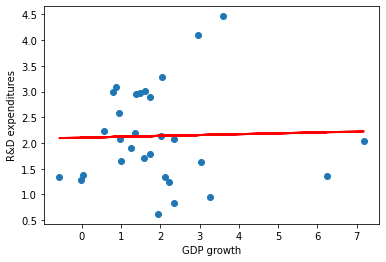

In [32]:
#Зависимость между ростом ВВП и затратами на НИОКР для развитых стран
X = dc[['gdp_growth']].values
y = dc['rd'].values
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2)
plt.xlabel('GDP growth')
plt.ylabel('R&D expenditures')

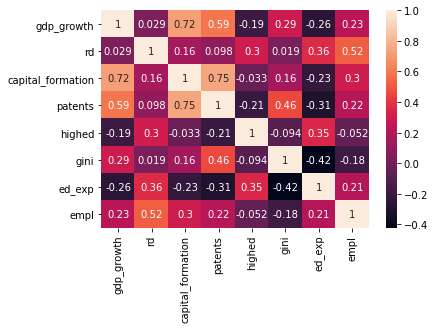

In [33]:
#heatmap для развитых стран
cols = ['gdp_growth', 'rd', 'capital_formation', 'patents', 'highed', 'gini', 'ed_exp', 'empl']
hm = sns.heatmap(dc[cols].corr(),
                 cbar=True,
                 annot=True)

Slope: 0.08
Intercept: 0.24


Text(0, 0.5, 'R&D expenditures')

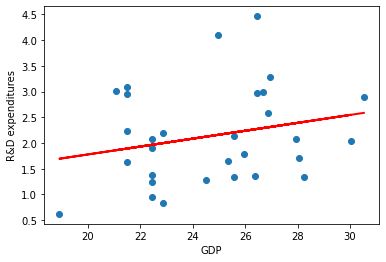

In [34]:
#зависимость меджу ВВП и затратами на НИОКР
dc['gdp'] = dc['gdp'].apply(math.log).tolist()
X = dc[['gdp']].values
y = dc['rd'].values
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2)
plt.xlabel('GDP')
plt.ylabel('R&D expenditures')

Slope: 3.40
Intercept: -8.94


Text(0, 0.5, 'GDP growth')

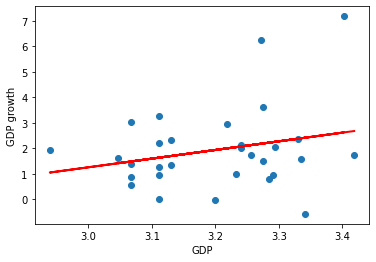

In [35]:
#зависимость между ВВП и затратами на НИОКР для развитых стран
dc['gdp'] = dc['gdp'].apply(math.log).tolist()
X = dc[['gdp']].values
y = dc['gdp_growth'].values
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2)
plt.xlabel('GDP')
plt.ylabel('GDP growth')